In [31]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [41]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Input,Convolution2D,MaxPooling2D,Flatten,Dense,Dropout
import tensorflow
from keras import utils
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [42]:
x = pd.read_csv('/content/gdrive/MyDrive/fashion-mnist.csv')
X_= np.array(x)
X = X_[:,1:]
X=X/255.0
y = X_[:,0]
print(X.shape,y.shape)

(10000, 784) (10000,)


In [43]:
X_train =X.reshape((-1,28,28,1))
Y_train = to_categorical(y)

print(X_train.shape,Y_train.shape)

(10000, 28, 28, 1) (10000, 10)


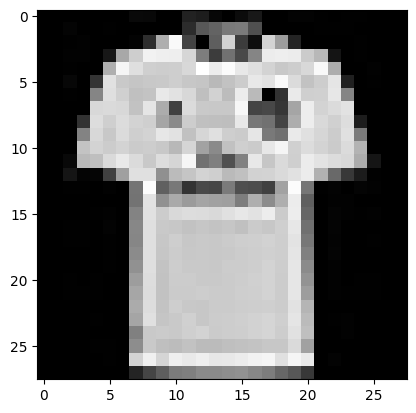

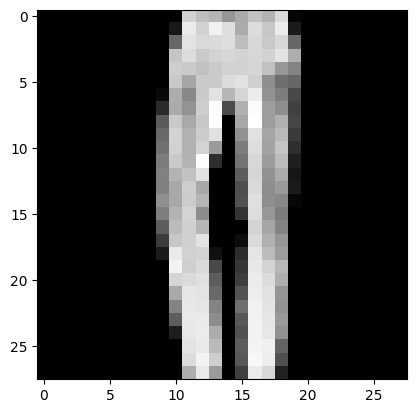

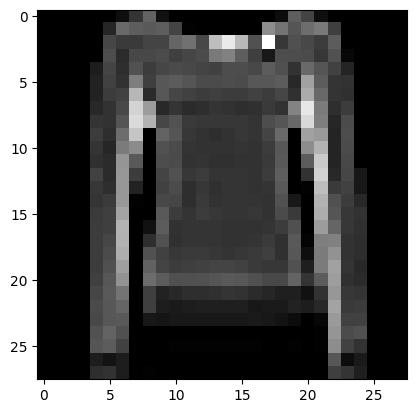

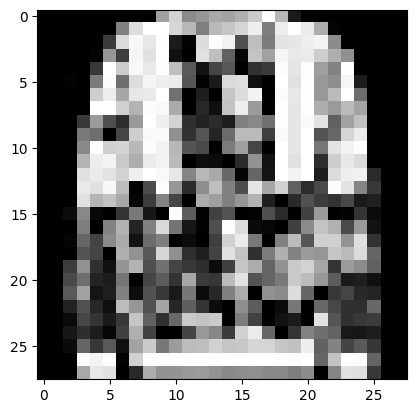

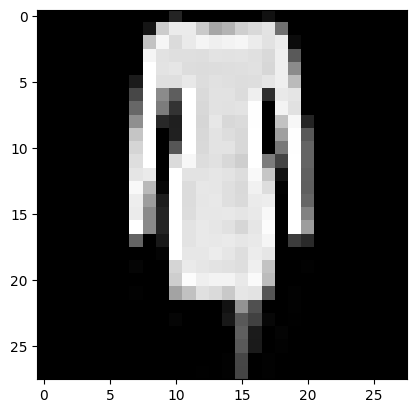

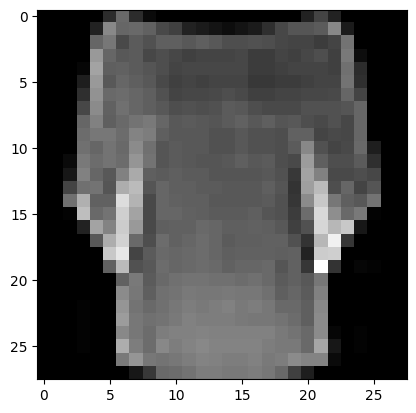

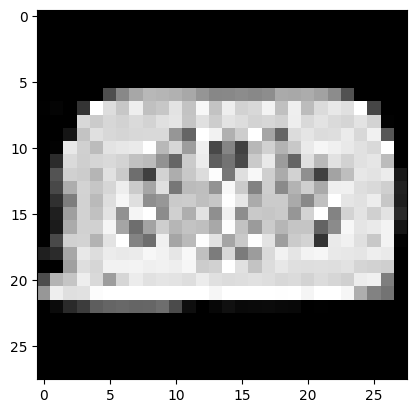

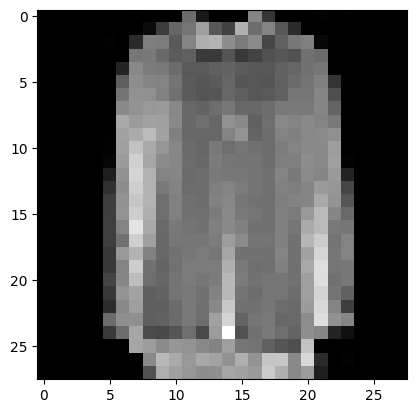

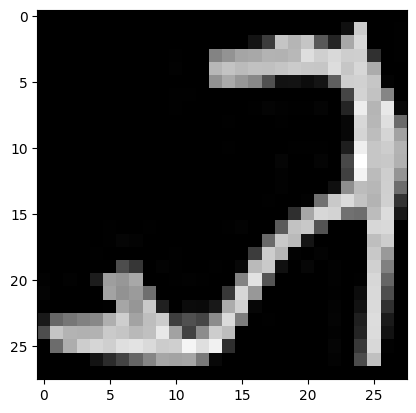

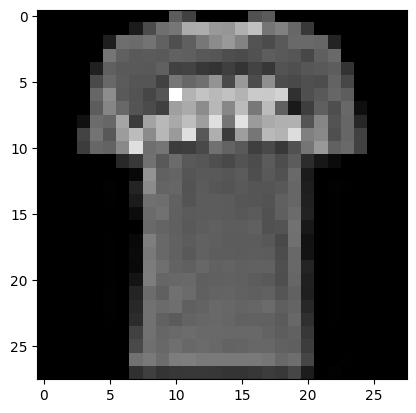

In [44]:
for i in range(10):
  plt.imshow(X_train[i],cmap="gray")
  plt.show()

In [45]:
model=Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(32,(5,5),activation='relu'))
model.add(Convolution2D(8,(5,5),activation='relu'))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 32)          51232     
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 8)           6408      
                                                        

In [47]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [49]:
hist=model.fit(X_train,Y_train,epochs=10,shuffle=True,batch_size=256,validation_split=0.20)

Epoch 1/10
32/32 [==============================] - 30s 921ms/step - loss: 0.5189 - accuracy: 0.8112 - val_loss: 0.5107 - val_accuracy: 0.8190
Epoch 2/10
32/32 [==============================] - 28s 893ms/step - loss: 0.4935 - accuracy: 0.8215 - val_loss: 0.5151 - val_accuracy: 0.8220
Epoch 3/10
32/32 [==============================] - 28s 861ms/step - loss: 0.4604 - accuracy: 0.8335 - val_loss: 0.4845 - val_accuracy: 0.8335
Epoch 4/10
32/32 [==============================] - 32s 1s/step - loss: 0.4512 - accuracy: 0.8384 - val_loss: 0.4709 - val_accuracy: 0.8370
Epoch 5/10
32/32 [==============================] - 32s 993ms/step - loss: 0.4342 - accuracy: 0.8421 - val_loss: 0.4386 - val_accuracy: 0.8515
Epoch 6/10
32/32 [==============================] - 29s 896ms/step - loss: 0.4024 - accuracy: 0.8585 - val_loss: 0.4291 - val_accuracy: 0.8500
Epoch 7/10
32/32 [==============================] - 30s 927ms/step - loss: 0.3922 - accuracy: 0.8577 - val_loss: 0.4496 - val_accuracy: 0.8515
Ep

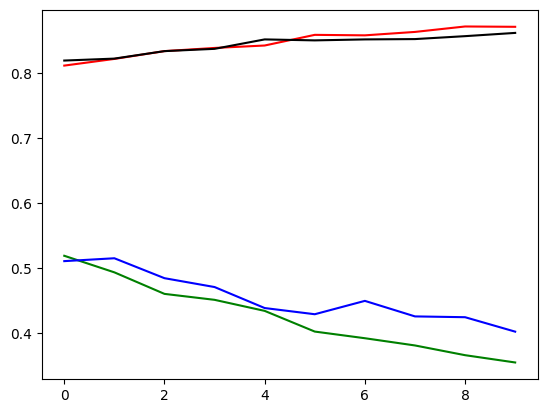

In [52]:
plt.figure(0)
plt.plot(hist.history['loss'],'g')
plt.plot(hist.history['val_loss'],'b')

plt.plot(hist.history['accuracy'],'r')
plt.plot(hist.history['val_accuracy'],'black')
plt.show()